
<p><img src="../IMAGES/Logo-UFCG.png" width="80" ></p>

# Introdução à Astrofísica e Cosmologia

## A Esfera Celeste

**Luciano Barosi**

## Introdução ao Curso



A astronomia é a mais antiga atividade humana registrada, devido a importância da observação dos astros para as medidas de tempo tão necessárias à Agricultura.

Mas a primeira observação de cada um de nós, em nossas próprias vidas, é de uma estrela importante para nós:  Sol.

Alguns de nós observam mais ou menos este fenômeno da natureza, e no mundo tecnológico de hoje, cada vez menos. Mas observações muito simples com o Sol podem nos oferecer importantes descobertas.

Vamos retomar aqui algumas observações feitas por Erathostenes (Cirene, 276 a.C. — Alexandria, 194 a.C.) que demonstrou que a Terra é redonda com o uso simples da trigonometria e da posição do Sol.

Talvez o fato de observarmos pouco o Sol seja o motivo para o aumento do número de terraplanistas hoje!

### A Experiência de Erathostenes

O código Mathematica abaixo obtem as posições das duas cidades que Eratóstenes utilizou para a sua medida, Alexandria e Aswan. Mostramos a medida em um dia em 200a.c. *(esta é uma medida que muda com o tempo, você sabe por que?*

Mostramos a posição do Sol próximo ao meio dia em cada um dos locais, em diferentes sistemas de coordenadas.

Usando a medida de Erathostenes calculamos o Raio da Terra e comparamos com o valor oficial atual.


In [1]:
Cidades = {{"Alexandria", "Alexandria", "Egypt"}, {"Aswan", "Aswan", 
    "Egypt"}};
Coordenadas = CityData[#, "Coordinates"] & /@ Cidades;
Dia = DateObject[{-200, 6, 21}, TimeZone -> 2];
MeioDia = DateObject[{-200, 6, 21, 11, 45, 0}, TimeZone -> 2];
PosicaoSol = 
 SunPosition[#, MeioDia, CelestialSystem -> "Equatorial"] & /@ 
  Coordenadas
PosicaoSol = SunPosition[#, MeioDia] & /@ Coordenadas
Distancia = GeoDistance @@ Coordenadas
MedidaAngulo = 7.2;
Circunferencia = 360*Distancia/MedidaAngulo
Raio = Circunferencia/(2 Pi)
PlanetData["Earth", "Radius"]

{{5.854 hours of right ascension, 23.701 degrees}, 
 
>   {5.854 hours of right ascension, 23.701 degrees}}
{{160.54 degrees, 82.06 degrees}, {192.09 degrees, 89.61 degrees}}
843.628 kilometers
42181.4 kilometers
6713.38 kilometers
6371.009 kilometers

O Sol se move de um jeito diferente em cada latitude de nosso planeta e em cada dia. Podemos desenhar a trajetória do Sol no céu para momentos diferentes (chamado de analema) e podemos traçar a trajetória do Sol em um dia específico. (A **Eclíptica**).

Abaixo sobrepomos como dois observadores em Alexandria e Aswan descreveriam o movimento do Sol.

-Graphics3D-
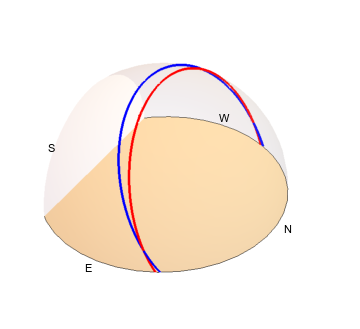

In [67]:
intervaloDiurno = 
  TimeZoneConvert[
     DateRange[Sunrise[#, Dia], Sunset[#, Dia], {1, "Minute"}], 2] & /@
    Coordenadas;
plot1 = Graphics[
   {Red, Point@Map[QuantityMagnitude,
      SunPosition[Coordenadas[[1]], intervaloDiurno[[1]]][
       "Values"], {2}]},
   	FrameLabel -> {"Azimute", "Altitude"}, Frame -> True,
   	FrameLabel -> "Posição do Sol em "];
coordsToCartesian = 
  Evaluate[CoordinateTransformData["Spherical" -> "Cartesian", 
     "Mapping", {1, \[Pi]/2 - (#2 Pi/180), 2 Pi - (#1 Pi/180)}]] &;
posicaoSolar[n_] := Map[QuantityMagnitude,
  SunPosition[Coordenadas[[n]], intervaloDiurno[[1]]]["Values"], {2}]
vista = Graphics3D[{Black, 
    Table[Text[{"W", "S", "E", "N"}[[j]], 
      1.1 {Cos[Pi/2 j], Sin[Pi/2 j], 0}], {j, 4}], Thickness[.007], 
    Red, Line@(coordsToCartesian @@@ posicaoSolar[2]), Blue, 
    Line@(coordsToCartesian @@@ posicaoSolar[1]), White, 
    Cylinder[{{0, 0, -.005}, {0, 0, 0}}], Opacity[.1], Sphere[]}, 
   PlotRange -> {0, 1}, Boxed -> False];
Show[vista]

-Graphics3D-
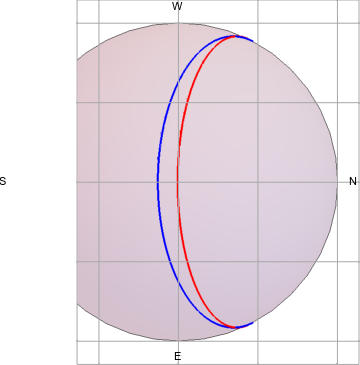

In [73]:
Show[vista, ViewPoint -> {0, 0, \[Infinity]}, FaceGrids -> All]

### Far Far Away

Antes de iniciarmos nosso estudo sistemático das coordenadas celestes, vamos mostrar a necessidade delas ilustrando com fenômenos mais recentemente estudados mas que ocorreram no passado distante do Universo. Nesse curso faremos este caminho, do Sol ao Big Bang.

Jupyter Notebook permite que usemos várias linguagens al longo do texto. **Esta é a hora de ligar o Kernal Python**

In [22]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/yDiD8F9ItX0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/home/lbarosi/miniconda3/envs/cosmos3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Tempo 

In [19]:
#Carregando os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz
import astropy.coordinates as coord

from astroplan import Observer, FixedTarget

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline



### Tempo astronômico é mais do que uma simples data

In [2]:
now = Time.now()    # Current UTC Time
now
print(now)

<Time object: scale='utc' format='datetime' value=2020-03-10 00:31:28.119649>

2020-03-10 00:31:28.119649


#### Diferentes formatos de tempo tem diferentes usos.

In [3]:
print(now.jd)               # Julian Date
print(now.mjd)              # Modified Julian Date
print(now.unix)             # Seconds since the unix epoch (Jan 01, 1970 00:00:00 UTC)
print(now.decimalyear)      # Fraction of the year (very useful for plotting)

2458918.5218532365
58918.02185323668
1583800288.119649
2020.188584298461


#### Operações com tempo

In [4]:
Ferias = Time("2020-07-08 00:00:00", format='iso')

dt = Ferias - now
print(dt.to(u.d))           # diferença em dias
print(dt.to(u.week))        # diferença em semanas
print(dt.to(u.s))           # diferença em segundos

119.97814676332176 d
17.139735251903108 wk
10366111.880351 s


#### Fuso Horário

In [5]:
meufuso = pytz.timezone("America/Recife")
t_local = now.to_datetime(meufuso)
print("O horário local é {0}".format(t_local))

O horário local é 2020-03-09 21:31:28.119649-03:00


In [6]:
# Quer procurar uma Timezone?
tz_query = "America/R"
lst = pytz.all_timezones
[x for x in lst if tz_query in x]

['America/Rainy_River',
 'America/Rankin_Inlet',
 'America/Recife',
 'America/Regina',
 'America/Resolute',
 'America/Rio_Branco',
 'America/Rosario']

#### Algumas vezes precisamos de super precisão temporal. 

O período orbital da terra muda constantemente. A orientação da Terra precisa ser medida continuamente com respeito aos quasares distantes para construirmos uma medida acurada. As medições são registradas no
International Earth Rotation and Reference Systems Service (IERS). 

In [7]:
from astroplan import download_IERS_A
download_IERS_A()

## O Observador

#### Onde Estamos?

In [8]:
try:
    import geopy
except ImportError:
    import sys
    !{sys.executable} -m pip install geopy

  Using cached https://files.pythonhosted.org/packages/53/fc/3d1b47e8e82ea12c25203929efb1b964918a77067a874b2c7631e2ec35ec/geopy-1.21.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8b/62/26ec95a98ba64299163199e95ad1b0e34ad3f4e176e221c40245f211e425/geographiclib-1.50-py3-none-any.whl


In [9]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="UAF")
location = geolocator.geocode("Rua Aprígio Veloso 800 Campina Grande PB")
print((location.latitude, location.longitude))

(-7.2169332, -35.9079304)


In [10]:
astrolab = Observer(longitude = location.longitude * u.deg,
                    latitude = location.latitude * u.deg,
                    elevation = 800 * u.m,
                    timezone = 'America/Recife',
                    name = "Astrolab"
                    )
astrolab

<Observer: name='Astrolab',
    location (lon, lat, el)=(-35.9079304 deg, -7.216933199999999 deg, 800.0000000004397 m),
    timezone=<DstTzInfo 'America/Recife' LMT-1 day, 21:40:00 STD>>

#### Info

In [11]:
sunset_here = astrolab.sun_set_time(now, which='nearest')
sunrise_here = astrolab.sun_rise_time(now, which='next')
midnight_here = astrolab.midnight(now, which='next')

print("Por do Sol será em {0.iso} UTC".format(sunset_here))
print("Meia-noite local será em {0.iso} UTC".format(midnight_here))
print("Nascer do Sol será em  {0.iso} UTC".format(sunrise_here))

print("Por do Sol será em  {0} hora local".format(sunset_here.to_datetime(meufuso)))
print("Meia-noite local será em {0} hora local".format(midnight_here.to_datetime(meufuso)))
print("Nascer do Sol será em {0} hora local".format(sunrise_here.to_datetime(meufuso)))

Por do Sol será em 2020-03-09 20:36:00.323 UTC
Meia-noite local será em 2020-03-10 02:33:57.479 UTC
Nascer do Sol será em  2020-03-10 08:31:52.306 UTC
Por do Sol será em  2020-03-09 17:36:00.323279-03:00 hora local
Meia-noite local será em 2020-03-09 23:33:57.478843-03:00 hora local
Nascer do Sol será em 2020-03-10 05:31:52.306117-03:00 hora local


### Olhando para objetos no céu

In [12]:
from astroplan import FixedTarget
from astropy.coordinates import SkyCoord

In [13]:
# Targets are stored as `astroplan.FixedTarget` objects
target_names = ["Sirius", "Rigel", "Betelgeuse", "Aldebaran"]
targets = [FixedTarget.from_name(target) for target in target_names]

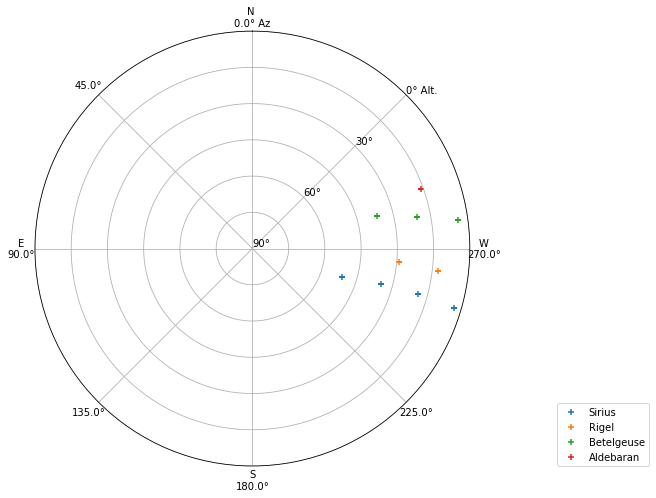

In [14]:
from astroplan.plots import plot_sky

# Plot at times: 
plot_times = Time.now() + np.linspace(0, 10, 10)*u.hour

guide_style = {'marker': '+'}
fig = plt.figure(figsize = (16,8))
for target in targets:
    plot_sky(target, astrolab, plot_times, style_kwargs=guide_style)
plt.legend(loc=[1.2, 0])
plt.show();

## Coordenadas Celestes

### Um exemplo: Pulsares

Podemos acessar o catálogo de pulsares em https://www.atnf.csiro.au/research/pulsar/index.html

"The ATNF Pulsar Catalogue", R. N. Manchester, G. B. Hobbs, A. Teoh & M. Hobbs, Astronomical Journal, 129, 1993-2006 (2005) and by quoting the web address http://www.atnf.csiro.au/research/pulsar/psrcat for updated versions.

Este catálogo pode ser acessado online ou pelo programa psrcat. Eu apenas salvei as informações em um formato CSV.

In [15]:
#Lemos os dados, definimos o separador, cuidados do cabeçalho e dos valores esquisitos que aparecem no arquivo.
df = pd.read_csv("../DATA/ATNFcatalogP0.csv", sep=";", header=0, na_values="*", keep_default_na=True)
# Horrível mas ocabecalho original tem duas linhas, estou jogando uma fora.
df = df.drop([0])
#Voilá
df.head(3)

,num,NAME,Gl,Gb,RAJD,DECJD,P0,DM,S1400,R_LUM14,Unnamed: 10
1,1,J0002+6216,117.327,-0.074,0.742375,62.269278,0.115364,218.60,0.02,8.90e-01,NaN
2,2,J0006+1834,108.172,-42.985,1.520000,18.583056,0.693748,11.41,NaN,NaN,NaN
3,3,J0007+7303,119.660,10.463,1.757083,73.052056,0.315873,NaN,NaN,NaN,NaN


#### Coordenadas Galácticas

In [ ]:
# pandas não reconheceu l e b como números, corrigimos isto aqui.
df["Gl"] = df.Gl.astype(float)
df["Gb"] = df.Gb.astype(float)

In [ ]:
# Vamos usar uma coordenada do tipo ângulo do astropy. 
# a Longitude Galáctica vai de é um ângulo de -180 a 180
# Passamos tudo para radianos
GL = coord.Angle(df.Gl*u.degree)
GL = GL.wrap_at(180*u.degree)
df["GB"] = coord.Angle(df.Gb*u.degree).radian
df["GL"] = GL.radian

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_title("Pulsares em Coordenadas Galácticas")
ax.scatter(df.GL, df.GB, s = 1)
ax.grid(True)
#fig.savefig('PulsarsG.png', dpi=150)
plt.show();

#### Coordenadas Equatoriais

In [16]:
# pandas não reconheceu l e b como números, corrigimos isto aqui.
df["Gl"] = df.Gl.astype(float)
df["Gb"] = df.Gb.astype(float)

In [20]:
# Vamos usar uma coordenada do tipo ângulo do astropy. 
# a Longitude Galáctica vai de é um ângulo de -180 a 180
# Passamos tudo para radianos
GL = coord.Angle(df.Gl*u.degree)
GL = GL.wrap_at(180*u.degree)
df["GB"] = coord.Angle(df.Gb*u.degree).radian
df["GL"] = GL.radian

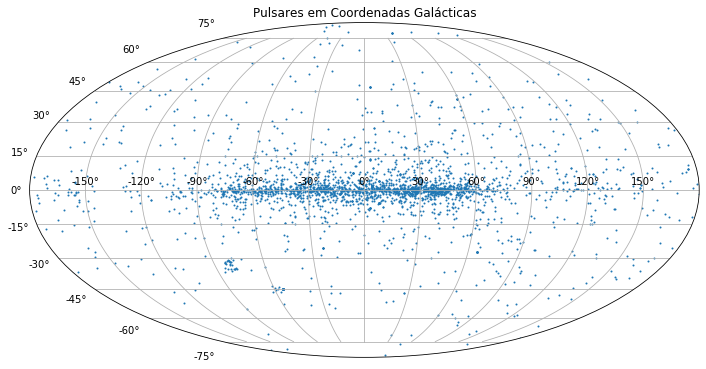

In [21]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_title("Pulsares em Coordenadas Galácticas")
ax.scatter(df.GL, df.GB, s = 1)
ax.grid(True)
#fig.savefig('PulsarsG.png', dpi=150)
plt.show();

### Sistema Alt-Az - Horizontal

Esse é o sistema de coordenadas mais natural para um observador solitá-
rio, levando em conta apenas elementos imediatamente visíveis para ele.
Consideramos que existe uma abóboda celeste sobre o observador,
seu ponto mais elevado é chamado **zênite**. Sua antípoda é o **nadir**.

A altitude **h** é definida como o ângulo medido a partir do horizonte ao
longo de um grande círculo, na direção do zênite.

Distância zenital **z** é o ângulo complementar a altitude.

**Azimute A** é o ângulo medido ao longo do horizonte, a partir do Norte
geográfico em direção ao Leste.

<tr>
    <td> <img src="../IMAGES/IMG_0064.PNG" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="../IMAGES/IMG_0071.PNG" alt="Drawing" style="width: 450px;"/> </td>
    </tr>

### Sistema Equatorial

<img src="../IMAGES/RA-DEC.jpg" alt="Drawing" style="width: 750px;"/>

Para construir um sistema de coordenadas que permaneça constante independentemente da posição da Terra, do movimento de Translação e da Rotação, introduz-se o sisteca de coordenadas equatoriais.

- **Equador Celeste:** é a projeção do plano que contém o plano da Terra para fora do espaço.
- **Polo Norte Celeste:** é definido projetando o eixo de rotação da Terra.

Com esta estrutura temos um sistema que independe da posição da Terra, basta agora definir um sistema semelhante ao sistema *(Latitude, Longitude)* com uma escolha adequada de meridiano de referência que sefa fixo para todos os observadores da Terra e independente dos movimentos da Terra.

A Escolha adotada para isso é o **Ponto de Equinócio Vernal**

A trajetória que Sol faz n céu é a projeção no plano da órbita da terra  na esfera celeste, e é chamada de **eclíptica**. Como o eixo da terra é inclinado $23.5^\circ$ com relação ao plano da órbita, isso significa que a eclíptica e o equador celeste se encontgram em dois pontos. O ponto em que  Sol esta passando do Hemisfério Sul para o Hemisfério Norte é chamado de **Ponto Vernal** 

C,o a definição da origem do sistema de coordenadas completa, o sistema de coordenadas equatorial utiliza a **declinação** $\delta$ como latitude, medida em ângulos a partir do equador celeste.

A **Ascensão reta** $\alpha$ é o análogo da longitude e é medida a partir do **ponto vernal**, no sentido anti-horário, até o **meridiano do objeto** (o grande círculo que passa pelo objeto e pelo pólo norte celeste. Convencionalmente a ascensão reta se mede em horas.

O **tempo sideral local** é definido como o tempo em que o equinócio vernal passou pelo meridiano local, o que também é conhecido como **hora-ângulo**.

### Transformações de Coordenadas

<img src="../IMAGES/IMG_0075.PNG" alt="Drawing" style="width: 750px;"/>

### Outros Sistemas de Coordenadas